In [1]:
from Dosepy.image import load_multiples
import plotly.express as px

In [2]:
# Import images
images = [
    "/media/luis/TOMO/Tiff Films/LATI/Film_a_20240711_003.tif",
    "/media/luis/TOMO/Tiff Films/LATI/Film_a_20240711_004.tif",
    "/media/luis/TOMO/Tiff Films/LATI/Film_a_20240711_005.tif",
]

tiff = load_multiples(images)

In [8]:
px.imshow(tiff.array)

In [7]:

# Import images including zero
images = [
    "/media/luis/TOMO/Tiff Films/LATI/Film_a_20240711_003.tif",
    "/media/luis/TOMO/Tiff Films/LATI/Film_a_20240711_004.tif",
    "/media/luis/TOMO/Tiff Films/LATI/Film_a_20240711_005.tif",
    "/media/luis/TOMO/Tiff Films/LATI/Film_draw_20240711_001.tif",
]

tiff = load_multiples(images)
px.imshow(tiff.array)

In [22]:
from Dosepy.tiff2dose import Tiff2DoseM, LUT
from Dosepy.image import ArrayImage, load

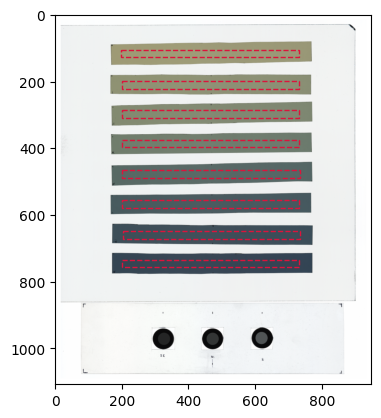

In [38]:
# Compute calibration

files = [
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_001.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_002.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_003.tif",
]

cal_image = load_multiples(files)
cal = LUT(cal_image)
cal.set_central_rois(size = (180, 8))
cal.set_doses([0, 0.5, 1, 2, 4, 6, 8, 10])
cal.plot_rois()
cal.set_beam_profile("/media/luis/TOMO/Tiff Films/BeamProfile.csv")
cal.compute_lateral_lut(filter = 5)

In [36]:
to_dose_manager: Tiff2DoseM = Tiff2DoseM()

In [39]:
tiff.set_labeled_films_and_filters()

In [40]:
px.imshow(tiff.labeled_films)

#### Remove objects that are not films

In [ ]:
#tiff.labeled_films[tiff.labeled_films == 1] = 0
#tiff.labeled_films[tiff.labeled_films == 3] = 0

tiff.array[tiff.labeled_films == 1] = 0
tiff.array[tiff.labeled_films == 3] = 0

In [ ]:
tiff.

In [35]:
px.imshow(tiff.labeled_films)

In [37]:
to_dose_manager.get_dose(
    img = tiff,
    format = "RP",
    lut = cal,
)

The film is not in the center of the scaner.


ValueError: The film is not in the center of the scaner.